In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

## Attempt to visualize the climate rating as a color dot

In [5]:
# Load dataframes
current = pd.read_csv('data/Current_Sheet.csv')
emissions_limited = pd.read_csv('data/Emissions_Limited_2040.csv')
business_as_usual = pd.read_csv('data/Business_as_Usual_2080.csv')
bau_plus_1degree = pd.read_csv('data/BAU_plus_1degree_2080.csv')
all_ubc_CAT = pd.read_csv('data/all_ubc_CAT_format.csv')

# Extracting only the Taxon and climate_rating columns
current_climate = current[['Taxon', 'climate_rating']].rename(columns={'climate_rating': 'Current'})
emissions_limited_2040 = emissions_limited[['Taxon', 'climate_rating']].rename(columns={'climate_rating': '2040'})
business_as_usual_2080 = business_as_usual[['Taxon', 'climate_rating']].rename(columns={'climate_rating': '2080'})
bau_plus_1degree_2080 = bau_plus_1degree[['Taxon', 'climate_rating']].rename(columns={'climate_rating': '2080_plus_1_degree'})

# Merge datasets on Taxon
merged_df = current_climate.merge(emissions_limited_2040, on='Taxon', how='outer')\
                            .merge(business_as_usual_2080, on='Taxon', how='outer')\
                            .merge(bau_plus_1degree_2080, on='Taxon', how='outer')

# Correcting the column names and extracting the required columns from the master list
selected_columns_df = all_ubc_CAT[['ItemAccNoFull', 'LocationCoordX', 'LocationCoordY', 'LifeForm', 'Taxon']]

# Merge with the previously merged dataset on 'Taxon'
final_merged_df = selected_columns_df.merge(merged_df, on='Taxon', how='inner')

# Show the resulting merged dataset
final_merged_df.head()


,ItemAccNoFull,LocationCoordX,LocationCoordY,LifeForm,Taxon,Current,2040,2080,2080_plus_1_degree
0,1981-0006.01,49.254466,-123.247566,Shrub,Abeliophyllum distichum,11,9,3,3
1,1998-0819.01,49.254466,-123.247566,Shrub,Abeliophyllum distichum,11,9,3,3
2,2014-0168.01,49.253642,-123.251150,Shrub,Abeliophyllum distichum,11,9,3,3
3,1999-0404.01,49.253365,-123.246025,Shrub,Abeliophyllum distichum,11,9,3,3
4,1999-0404.02,49.254563,-123.247670,Shrub,Abeliophyllum distichum,11,9,3,3


C:\Users\KUB\AppData\Local\Temp\ipykernel_2016\371354728.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


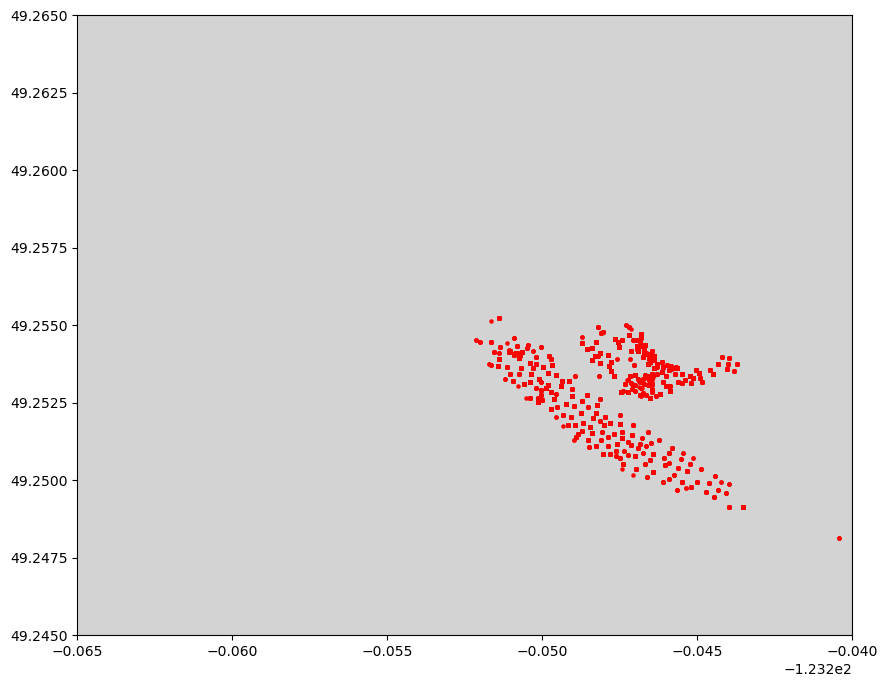

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Define the bounding box for UBC Botanical Garden area
minx, miny, maxx, maxy = -123.2650, 49.2450, -123.2400, 49.2650

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crop the world map to the bounding box
vancouver_area = world.cx[minx:maxx, miny:maxy]

# Create a GeoDataFrame for your data
geometry = [Point(xy) for xy in zip(final_merged_df['LocationCoordY'], final_merged_df['LocationCoordX'])]
geo_df = gpd.GeoDataFrame(final_merged_df, geometry=geometry)

# Plot the base map (Vancouver area)
ax = vancouver_area.plot(figsize=(10, 10), color='lightgrey')

# Plot the points on top
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Set the x and y limits to focus on the UBC area
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Show the plot
plt.show();  # Use plt.show() to display the plot



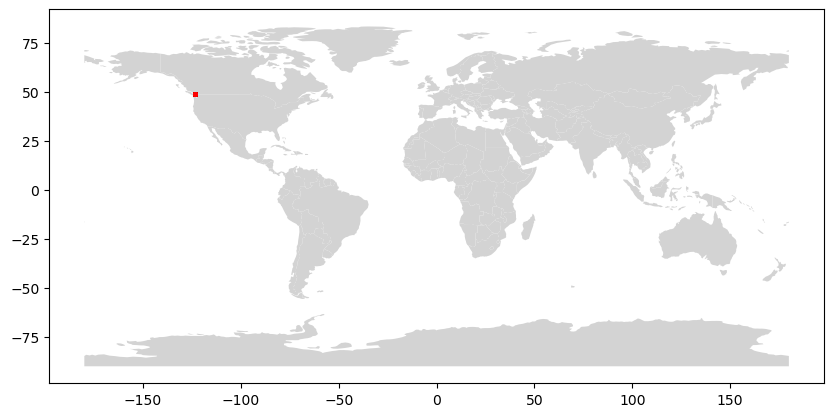

In [7]:
# Plot the entire world map
ax = world.plot(figsize=(10, 10), color='lightgrey')

# Plot all points
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Show the plot
plt.show()


In [8]:
print(final_merged_df[['LocationCoordX', 'LocationCoordY']].head())

   LocationCoordX  LocationCoordY
0       49.254466     -123.247566
1       49.254466     -123.247566
2       49.253642     -123.251150
3       49.253365     -123.246025
4       49.254563     -123.247670
